In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

from scripts.load_data import load_ufo_data
from scripts.clean_data import clean_columns, preprocess_datetime, standardize_values

In [2]:
df = load_ufo_data("../data/scrubbed.csv")
df = clean_columns(df)
df = preprocess_datetime(df)
df = standardize_values(df)

In [3]:
df.head()

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,Longitude,Date,Time,Longitude
0,San marcos,TX,United States,Cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,1949-10-10,20:30,-97.941111
1,Lackland afb,TX,NaN,Light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,1949-10-10,21:00,-98.581082
2,Chester,NaN,Great Britain,Circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,1955-10-10,17:00,-2.916667
3,Edna,TX,United States,Circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,1956-10-10,21:00,-96.645833
4,Kaneohe,HI,United States,Light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,1960-10-10,20:00,-157.803611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80331 non-null  float64       
 9   Longitude             80332 non-null  float64       
 10  Date                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
 12  Longitude             80332 non-null  float64       
dtypes: datetime64[ns

In [5]:
df.isnull().sum()

City                       0
State                   5797
Country                 9670
Shape                   1932
Duration (seconds)         0
Duration (hours/min)       0
Comments                  15
Date_Posted                0
Latitude                   1
Longitude                  0
Date                       0
Time                       0
Longitude                  0
dtype: int64

1. Distribution of the sights

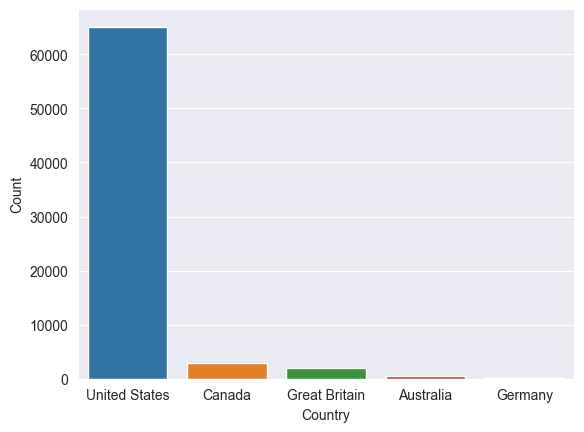

In [6]:
df_count = df["Country"].value_counts().reset_index()
sns.barplot(x="Country", y="count", hue="Country", data=df_count)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

1.1 Is there an area/region with more sights than others?


In [7]:
df_by_city_US = df.query("Country == 'United States'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_US

,Country,City,Count
8493,United States,Seattle,524
7368,United States,Phoenix,454
6539,United States,New york city,399
7609,United States,Portland,373
5103,United States,Las vegas,367
...,...,...,...
1908,United States,Colley,1
6310,United States,Mt. orab,1
6309,United States,Mt. olive,1
6304,United States,Mt. kisco,1


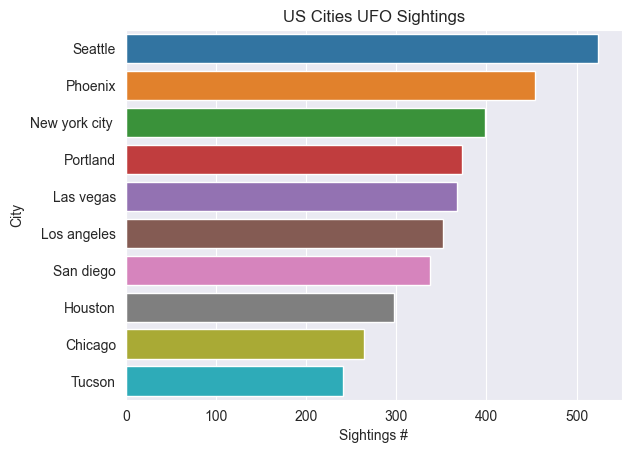

In [8]:
df_by_city_US_sorted = df_by_city_US.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_US_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("US Cities UFO Sightings")
plt.show()

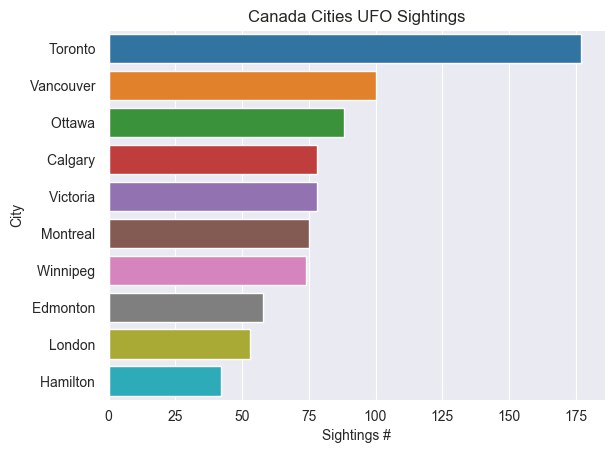

In [9]:
df_by_city_CA = df.query("Country == 'Canada'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)

df_by_city_CA_sorted = df_by_city_CA.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_CA_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Canada Cities UFO Sightings")

plt.show()

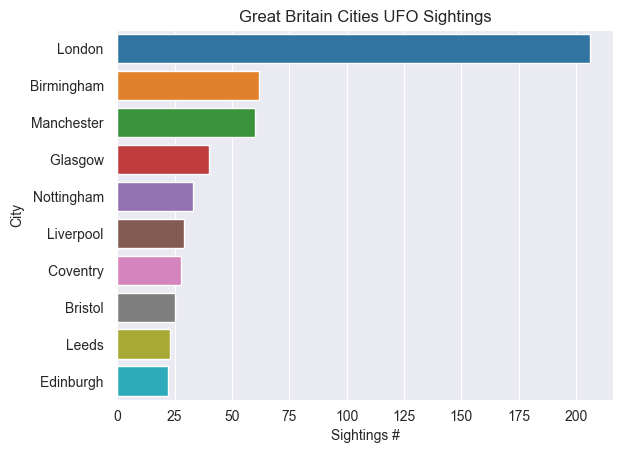

In [10]:
df_by_city_GB = df.query("Country == 'Great Britain'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)

df_by_city_GB_sorted = df_by_city_GB.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_GB_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Great Britain Cities UFO Sightings")
plt.show()

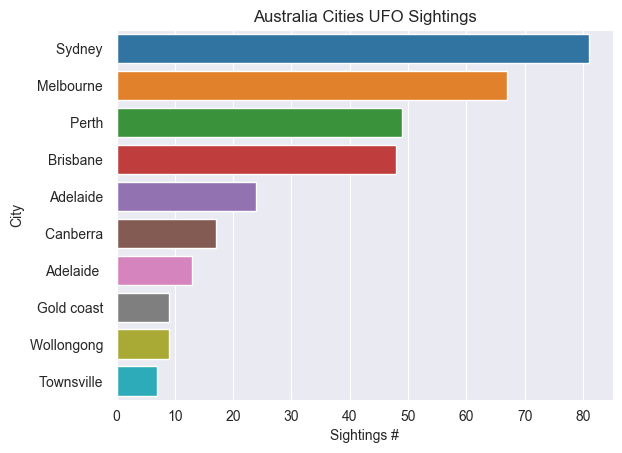

In [11]:
df_by_city_AU = df.query("Country == 'Australia'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)

df_by_city_AU_sorted = df_by_city_AU.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_AU_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Australia Cities UFO Sightings")
plt.show()

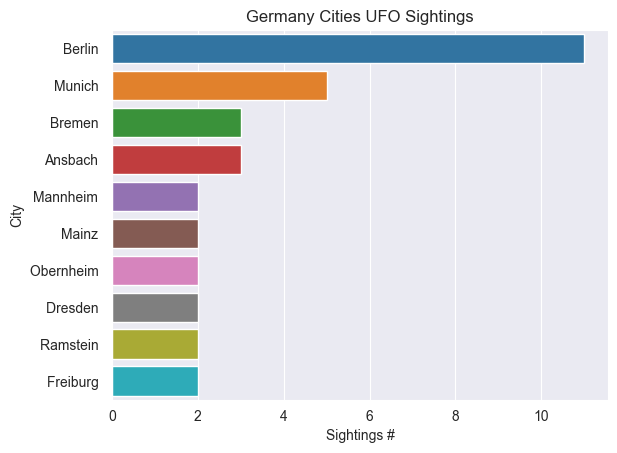

In [12]:
df_by_city_DE = df.query("Country == 'Germany'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)

df_by_city_DE_sorted = df_by_city_DE.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_DE_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Germany Cities UFO Sightings")
plt.show()

### Geographic Heat map

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80331 non-null  float64       
 9   Longitude             80332 non-null  float64       
 10  Date                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
 12  Longitude             80332 non-null  float64       
dtypes: datetime64[ns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80331 non-null  float64       
 9   Longitude             80332 non-null  float64       
 10  Date                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
 12  Longitude             80332 non-null  float64       
dtypes: datetime64[ns

In [15]:
df.columns

Index(['City', 'State', 'Country', 'Shape', 'Duration (seconds)',
       'Duration (hours/min)', 'Comments', 'Date_Posted', 'Latitude',
       'Longitude', 'Date', 'Time', 'Longitude '],
      dtype='object')

In [16]:
df = df.dropna(subset=["Latitude", "Longitude "])

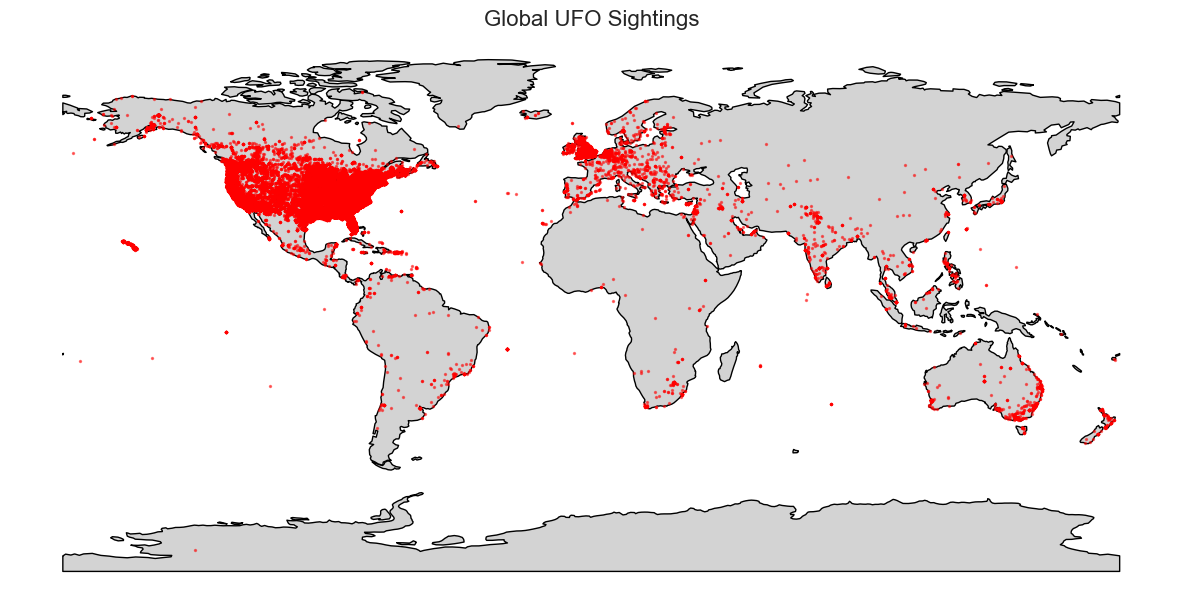

In [21]:
from scripts.geospatial_analysis import prepare_geodata, plot_world_map

gdf = prepare_geodata(df, lon_col="Longitude", lat_col="Latitude")
plot_world_map(gdf, output_file="../images/ufo_map.png")


Reports by Year

In [22]:
df["Year"] = df["Date_Posted"].dt.year

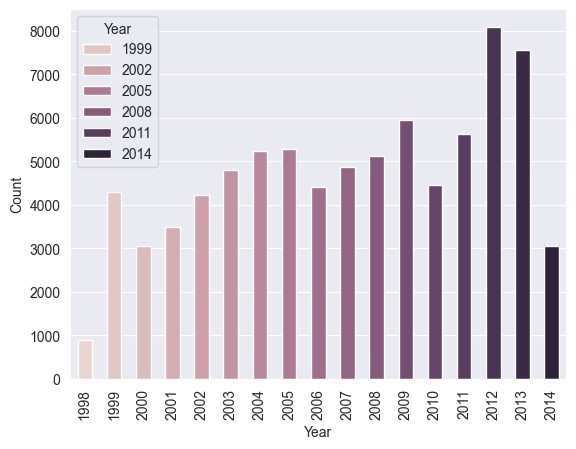

In [24]:
df_year = df["Year"].value_counts().reset_index()
sns.barplot(x="Year", y="count", hue="Year", width=0.5,data=df_year)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [25]:
df["Shape"].nunique()
df_shape = df["Shape"].value_counts().reset_index()

In [26]:
df_shape.fillna(0, inplace=True)

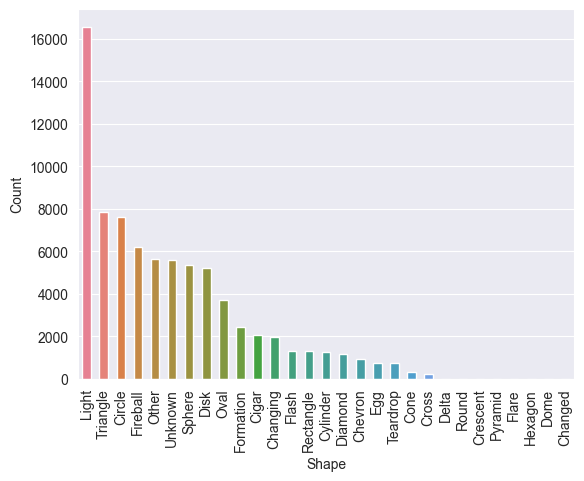

In [27]:
sns.barplot(x="Shape", y="count", hue="Shape", width=0.5,data=df_shape)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("Count")
plt.show()

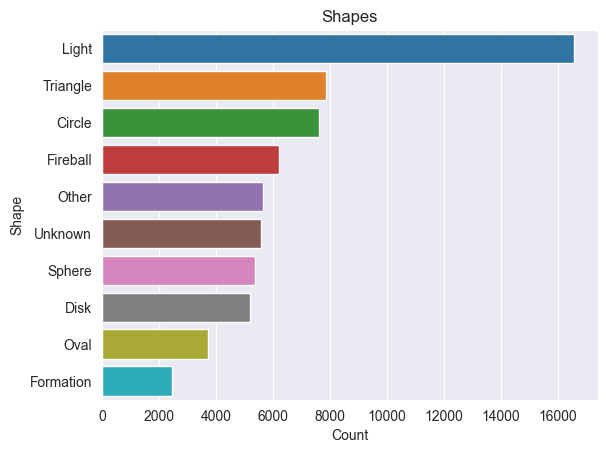

In [28]:
df_shapes_sorted = df_shape.iloc[0:10].sort_values(by="count", ascending=False)
sns.barplot(data=df_shapes_sorted, x="count", y="Shape", orient="h", hue="Shape")
plt.xlabel("Count")
plt.title("Shapes")
plt.show()